# Version T2
## Create at 2021/12/24
*  load h5 file
*  plot 1D curves
*  plot image
*  do line-cuts

# Load necessary python package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

T = True
F = False

In [2]:
%run -i /home/group/NSLSII_Data/User_Pipelines/Codes/user_v0.py

# Define IO

In [3]:
inDir = '/home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/HDF_Results/'
print('The input dir is: %s'%inDir)

The input dir is: /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/HDF_Results/


In [4]:
outDir = '/home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/PostAnalys/'
create_fullpath(  outDir )

Directory  /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/PostAnalys/  already exists


'/home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/PostAnalys/'

# Load data from hdf5

## Check the availabe data

In [5]:
fps = np.sort( ls_dir( inDir ) )
print(fps )
print( len(fps) )

['SSY_Au_LC3_0.0500deg_ts2021-10-30-05-37-13_dt463.h5'
 'SSY_Au_LC3_0.1500deg_ts2021-10-30-05-37-13_dt465.h5'
 'SSY_Au_LC3_0.3000deg_ts2021-10-30-05-37-13_dt455.h5'
 'SSY_Au_LC4_0.0500deg_ts2021-10-30-05-54-10_dt1283.h5'
 'SSY_Au_LC4_0.1500deg_ts2021-10-30-05-37-13_dt615.h5'
 'SSY_Au_LC4_0.3000deg_ts2021-10-30-05-54-10_dt1287.h5'
 'SSY_Pt-Fe3O4-15h-Si-1_0.0500deg_ts2021-10-31-07-04-32_dt679.h5'
 'SSY_Pt-Fe3O4-15h-Si-1_0.0500deg_ts2021-10-31-07-57-45_dt302.h5'
 'SSY_Pt-Fe3O4-15h-Si-1_0.3000deg_ts2021-10-31-07-57-45_dt299.h5'
 'SSY_Pt-Fe3O4-15h-Si-3_0.0500deg_ts2021-10-31-12-23-37_dt2526.h5'
 'SSY_Pt-Fe3O4-15h-Si-3_0.1500deg_ts2021-10-31-12-23-37_dt1474.h5'
 'SSY_Pt-Fe3O4-15h-Si-3_0.1500deg_ts2021-10-31-12-23-37_dt2004.h5'
 'SSY_Pt-Fe3O4-15h-Si-3_0.3000deg_ts2021-10-31-12-23-37_dt2149.h5'
 'SSY_Pt-Fe3O4-15h-Si-3_0.3000deg_ts2021-10-31-12-23-37_dt2238.h5'
 'SSY_Pt-Fe3O4-2h-Si-1_0.1500deg_ts2021-10-31-08-46-54_dt385.h5'
 'SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6.h5'
 'SSY_Pt-Fe3O4_3_t_3786.4_uvt

In [6]:
flist = ls_dir( inDir, and_list=[  ''    ], or_list=[], no_list=[   ])
print( len( flist ))
print( flist )

17
['SSY_Pt-Fe3O4-15h-Si-3_0.1500deg_ts2021-10-31-12-23-37_dt1474.h5'
 'SSY_Pt-Fe3O4-15h-Si-3_0.3000deg_ts2021-10-31-12-23-37_dt2238.h5'
 'SSY_Pt-Fe3O4-15h-Si-3_0.0500deg_ts2021-10-31-12-23-37_dt2526.h5'
 'SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6.h5'
 'SSY_Pt-Fe3O4-15h-Si-1_0.0500deg_ts2021-10-31-07-57-45_dt302.h5'
 'SSY_Pt-Fe3O4-2h-Si-1_0.1500deg_ts2021-10-31-08-46-54_dt385.h5'
 'SSY_Pt-Fe3O4-15h-Si-3_0.3000deg_ts2021-10-31-12-23-37_dt2149.h5'
 'SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4.h5'
 'SSY_Au_LC3_0.0500deg_ts2021-10-30-05-37-13_dt463.h5'
 'SSY_Au_LC3_0.1500deg_ts2021-10-30-05-37-13_dt465.h5'
 'SSY_Au_LC3_0.3000deg_ts2021-10-30-05-37-13_dt455.h5'
 'SSY_Au_LC4_0.0500deg_ts2021-10-30-05-54-10_dt1283.h5'
 'SSY_Au_LC4_0.1500deg_ts2021-10-30-05-37-13_dt615.h5'
 'SSY_Au_LC4_0.3000deg_ts2021-10-30-05-54-10_dt1287.h5'
 'SSY_Pt-Fe3O4-15h-Si-1_0.0500deg_ts2021-10-31-07-04-32_dt679.h5'
 'SSY_Pt-Fe3O4-15h-Si-1_0.3000deg_ts2021-10-31-07-57-45_dt299.h5'
 'SSY_Pt-Fe3O4-15h-Si-3_0.1500deg_ts2021-10-31-12-23

## Load transmission SAXS

In [7]:
sam = 'SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4.h5'
#for saxs image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'saxs', 'sqimg', 'sqphi' ] )  
print( D.keys() )
#print(D)

dict_keys(['saxs', 'sqimg', 'sqphi'])


## Load gisaxs

In [8]:
sam = 'SSY_Au_LC3_0.0500deg_ts2021-10-30-05-37-13_dt463.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'gisaxs', 'gisqimg' ] ) 
print( D.keys() )
#print(D)

dict_keys(['gisaxs', 'gisqimg'])


## Load transmission 900 KW-WAXS

In [9]:
sam = 'SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6.h5'
#for waxs 900 image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'waxs', 'wqimg', 'wqphi' ] )  
print( D.keys() )
#print(D)

dict_keys(['waxs', 'wqimg', 'wqphi'])


## Load transmission 300 KW-WAXS

In [10]:
sam = 'SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6.h5'
#for waxs 900 image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'waxs_300', 'wqimg_300',   'wqphi_300'  ] )  
print( D.keys() )
#print(D)

dict_keys(['waxs_300', 'wqimg_300', 'wqphi_300'])


## Load gi-900 KW-WAXS

In [11]:
sam = 'SSY_Pt-Fe3O4-15h-Si-3_0.1500deg_ts2021-10-31-12-23-37_dt1474.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'giwaxs', 'giwqimg' ] ) 
print( D.keys() )
#print(D)

dict_keys(['giwaxs', 'giwqimg'])


## Load gi-300 KW-WAXS

In [12]:
sam = 'SSY_Pt-Fe3O4-15h-Si-1_0.0500deg_ts2021-10-31-07-57-45_dt302.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'giwaxs_300', 'giwqimg_300' ] ) 
print( D.keys() )
#print(D)

dict_keys(['giwaxs_300', 'giwqimg_300'])


# Plot Data

### plot one-D curve

In [13]:
sam = 'SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4.h5'
#for saxs image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'saxs', 'sqimg', 'sqphi' ] )  
print( D.keys() )
#print(D)

dict_keys(['saxs', 'sqimg', 'sqphi'])


In [14]:
D['saxs'] 

{0: {'q': array([0.00400367, 0.00416097, 0.00431826, ..., 0.23947622, 0.23963351,
         0.23979081]),
  'iq': array([1625.16833496, 1662.19128418, 1637.36669922, ...,   29.73104858,
           30.85100937,   36.04663467]),
  's': 'SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4_x-2003.53_y3149.81_z-603.70_det5000.00m_expt1.1s_sid00004466_000001_SAXS.tif'}}

<IPython.core.display.Javascript object>


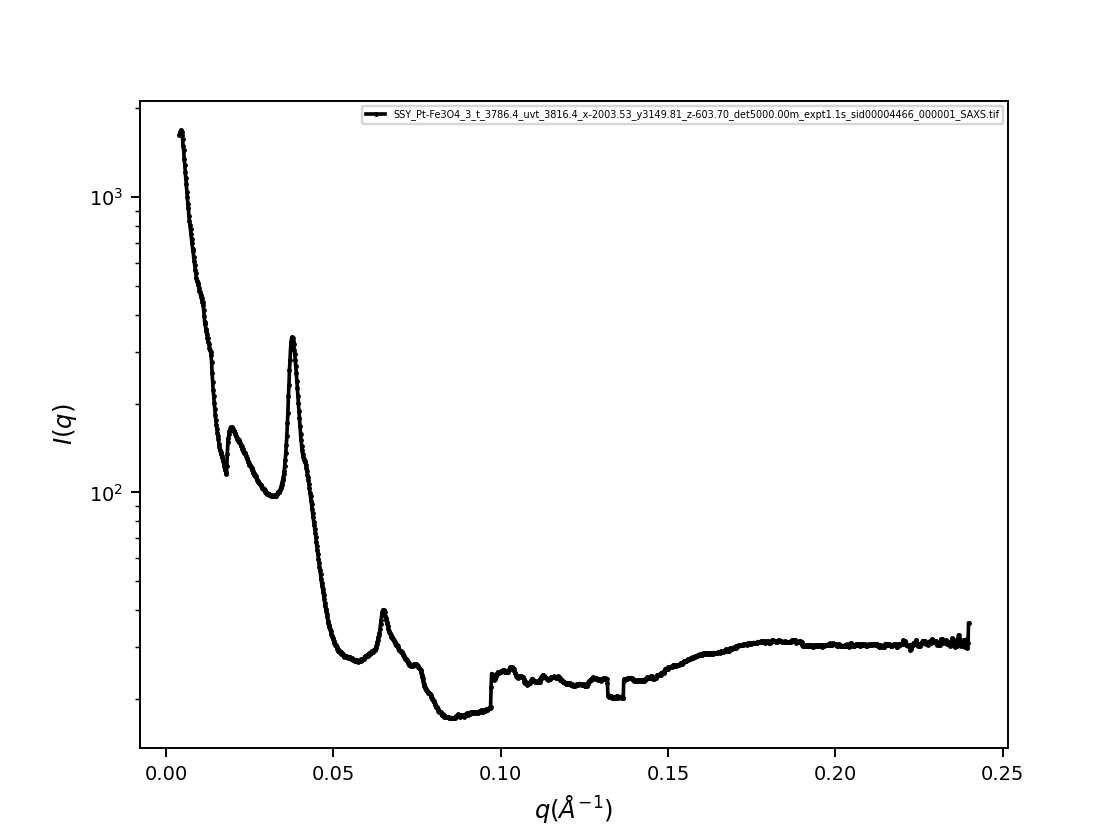

Text(0.5, 1.0, '')

In [15]:
fig, ax= plt.subplots() 
i = 0
d = D['saxs']
plot1D( x = d[i]['q'], y = d[i]['iq'], ax=ax,m=markers[i], ls='-', c=colors[i], 
       markersize = 1, logy=True, logx=False, legend= d[i]['s'], legend_size=4  ) 
ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel( r'$I(q) $')
#ax.set_xlim( [0.05, 4])
#ax.set_ylim( [450, 20e3] )
ax.set_title( '', fontsize=8 )
#plt.savefig( outDir + 'test.png' )  #save the plot

## Plot 2D image

In [16]:
sam = 'SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4.h5'
#for saxs image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'saxs', 'sqimg', 'sqphi' ] )  
print( D.keys() )
#print(D)

dict_keys(['saxs', 'sqimg', 'sqphi'])


### plot the q-img

<IPython.core.display.Javascript object>


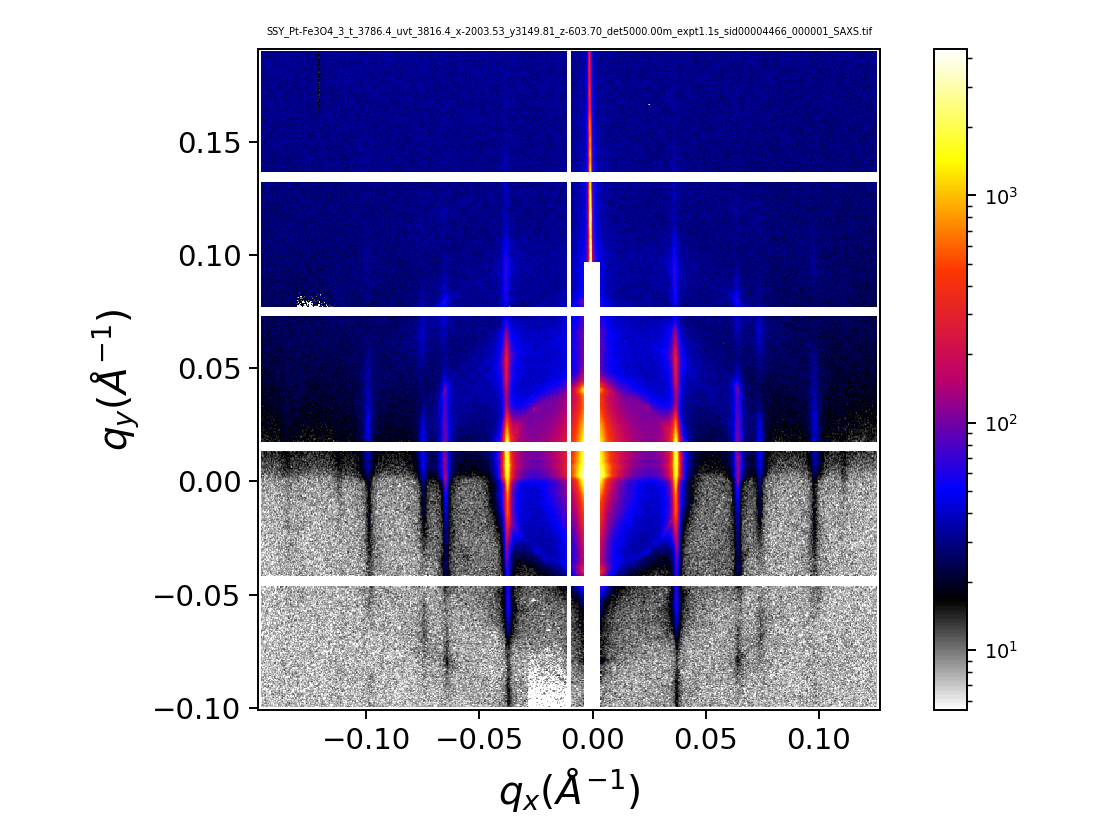

In [17]:
fig, ax= plt.subplots() 
i=0
img = D['sqimg']
tdxlabel=  r'$q_x (\AA^{-1})$' 
tdylabel=  r'$q_y (\AA^{-1})$' 
show_img( img[i]['img'],  extent=[img[i]['qr'][0], img[i]['qr'][-1], img[i]['qz'][0], img[i]['qz'][-1]  ],
   logs=True,  aspect=1.0, title_size=4,image_name=img[i]['s'], xlabel= tdxlabel,ylabel= tdylabel, 
         ax=[fig,ax],zlim=[.1,1], cmap=cmap_vge_hdr, show_colorbar=True  ) 
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

### plot the q-phi

<IPython.core.display.Javascript object>


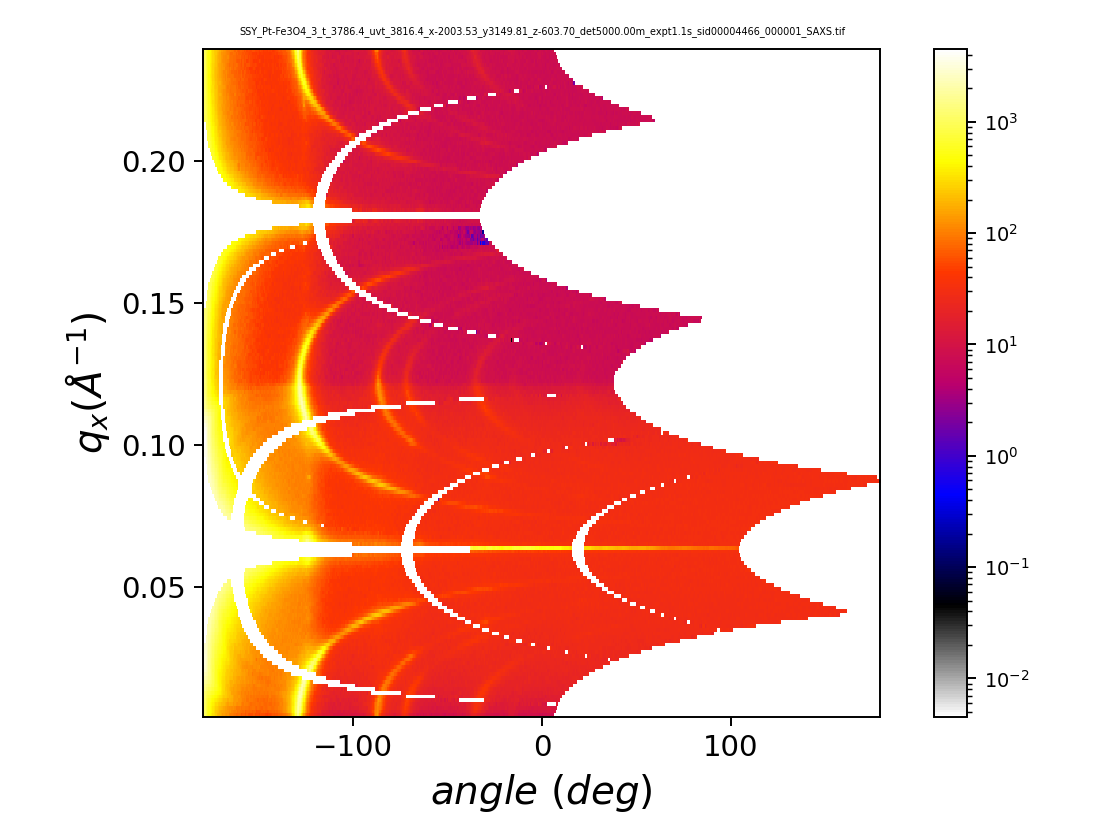

In [18]:
fig, ax= plt.subplots() 
i=0
img = D['sqphi']
tdxlabel= r'$angle\ (deg)$'
tdylabel=  r'$q_x (\AA^{-1})$' 
show_img( img[i]['img'],  extent=[img[i]['qr'][0], img[i]['qr'][-1], img[i]['qz'][0], img[i]['qz'][-1]  ],
   logs=True,  aspect=1500, title_size=4,image_name=img[i]['s'], xlabel= tdxlabel,ylabel= tdylabel, 
         ax=[fig,ax],zlim=[.1,1], cmap=cmap_vge_hdr, show_colorbar=True  ) 
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

### plot the gisaxs qr-qz

In [19]:
sam = 'SSY_Au_LC3_0.0500deg_ts2021-10-30-05-37-13_dt463.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'gisaxs', 'gisqimg' ] ) 
print( D.keys() )
#print(D)

dict_keys(['gisaxs', 'gisqimg'])


<IPython.core.display.Javascript object>


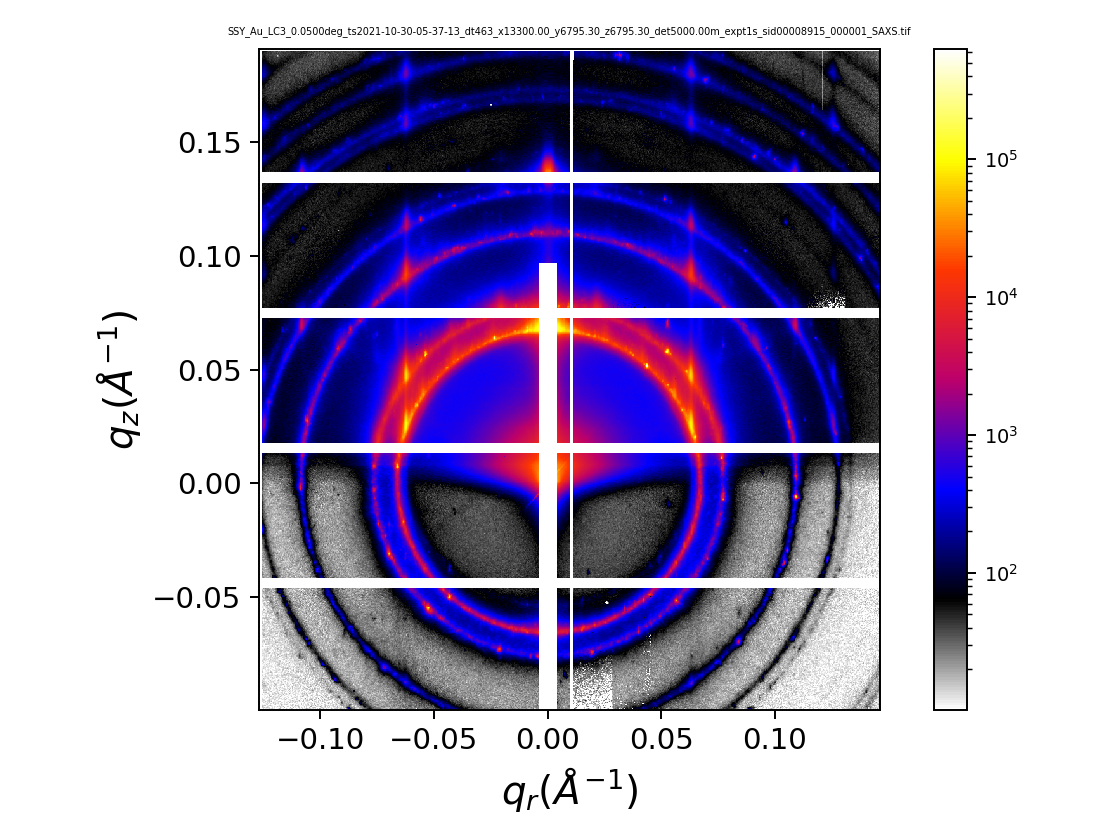

In [20]:
fig, ax= plt.subplots() 
i=0
img = D['gisqimg']
tdxlabel=  r'$q_r (\AA^{-1})$' 
tdylabel=  r'$q_z (\AA^{-1})$' 
show_img( img[i]['img'],  extent=[img[i]['qr'][0], img[i]['qr'][-1], img[i]['qz'][0], img[i]['qz'][-1]  ],
   logs=True,  aspect=1.0, title_size=4,image_name=img[i]['s'], xlabel= tdxlabel,ylabel= tdylabel, 
         ax=[fig,ax],zlim=[.1,1], cmap=cmap_vge_hdr, show_colorbar=True  ) 
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

# Do analysis

## linecuts

In [21]:
sam = 'SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4.h5'
#for saxs image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'saxs', 'sqimg', 'sqphi' ] )  
print( D.keys() )
#print(D)

dict_keys(['saxs', 'sqimg', 'sqphi'])


### Do a horizontal line cut  

In [22]:
qz_range_cut =[ 0.05, 0.055 ] #define the vertical range of the line cut

In [23]:
img = D['sqimg']

i=0
qr = D['sqimg'][i]['qr']
qz = D['sqimg'][i]['qz']
qimg_mask = ~(img[i]['img']==0)
qr_range_cut = None 
qr_range = [qr[0], qr[-1]] 
qz_range = [ qz[0], qz[-1]]

qr_1d, iqr_1d = get_Iq_from_QPhi(img[i]['img'], qr_range, qz_range, qmask=qimg_mask, Qrange= qr_range_cut, Prange=qz_range_cut)

/home/group/Software/pyScatt/pyScatt/generic_functions.py:975: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts


#### Save the linecut-curve

In [24]:
save_lists( data=[qr_1d, iqr_1d ], label=['qr_1d', 'iqr_1d'], 
           filename='test.csv', path=outDir, sep=',', verbose=True, return_res=False)

The data was saved in: /home/group/NSLSII_Data/SMI/2021_Cycle3/Results/SYang/PostAnalys/test.csv.


In [25]:
##Load the saved CSV file
# load_data = pds.read_csv(  outDir + 'test.csv' )
# print(load_data)
# x = load_data['qr_1d']
# y = load_data['iqr_1d']

## plot the image with the line-cut

<IPython.core.display.Javascript object>


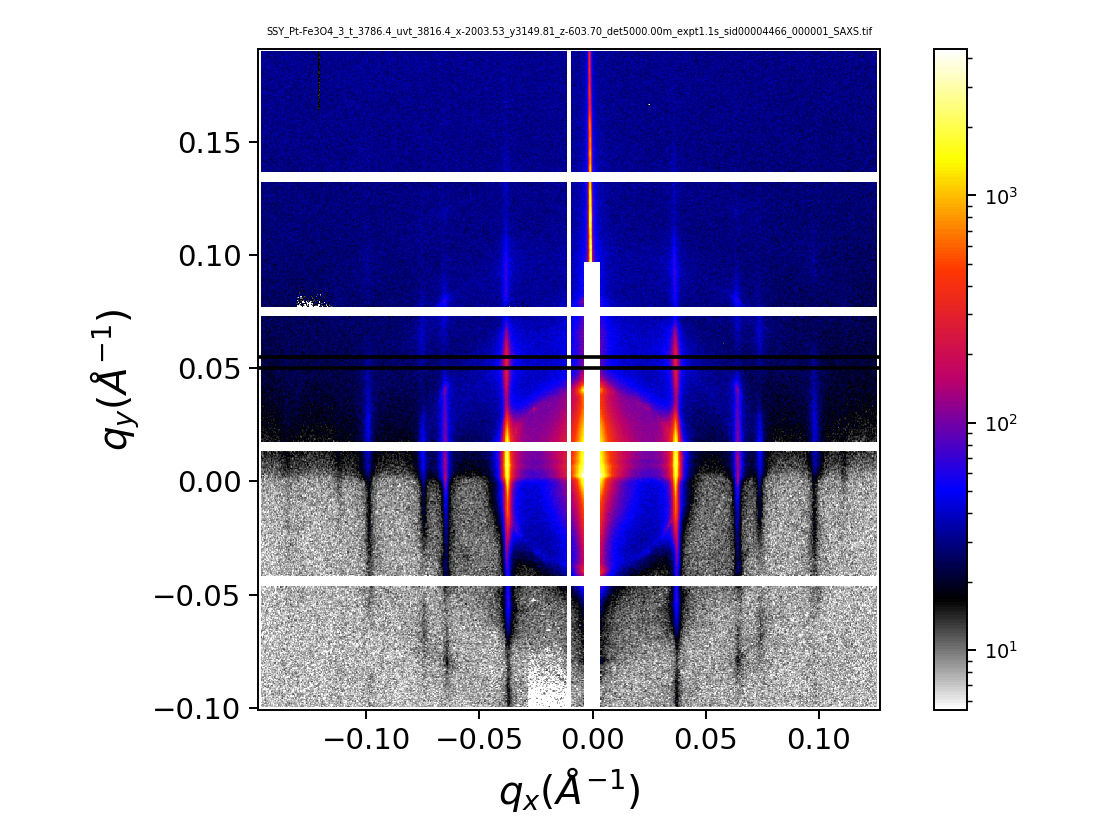

In [26]:
fig, ax= plt.subplots() 
i=0
tdxlabel=  r'$q_x (\AA^{-1})$' 
tdylabel=  r'$q_y (\AA^{-1})$' 
show_img( img[i]['img'],   extent=[qr[0], qr[-1], qz[0], qz[-1]  ],
   logs=True,  aspect=1.0, title_size=4,image_name=img[i]['s'], xlabel= tdxlabel,ylabel= tdylabel, 
         ax=[fig,ax],zlim=[.1,1], cmap=cmap_vge_hdr, show_colorbar=True  ) 
ax.hlines( qz_range_cut, qr[0], qr[-1], color='k')
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

<IPython.core.display.Javascript object>


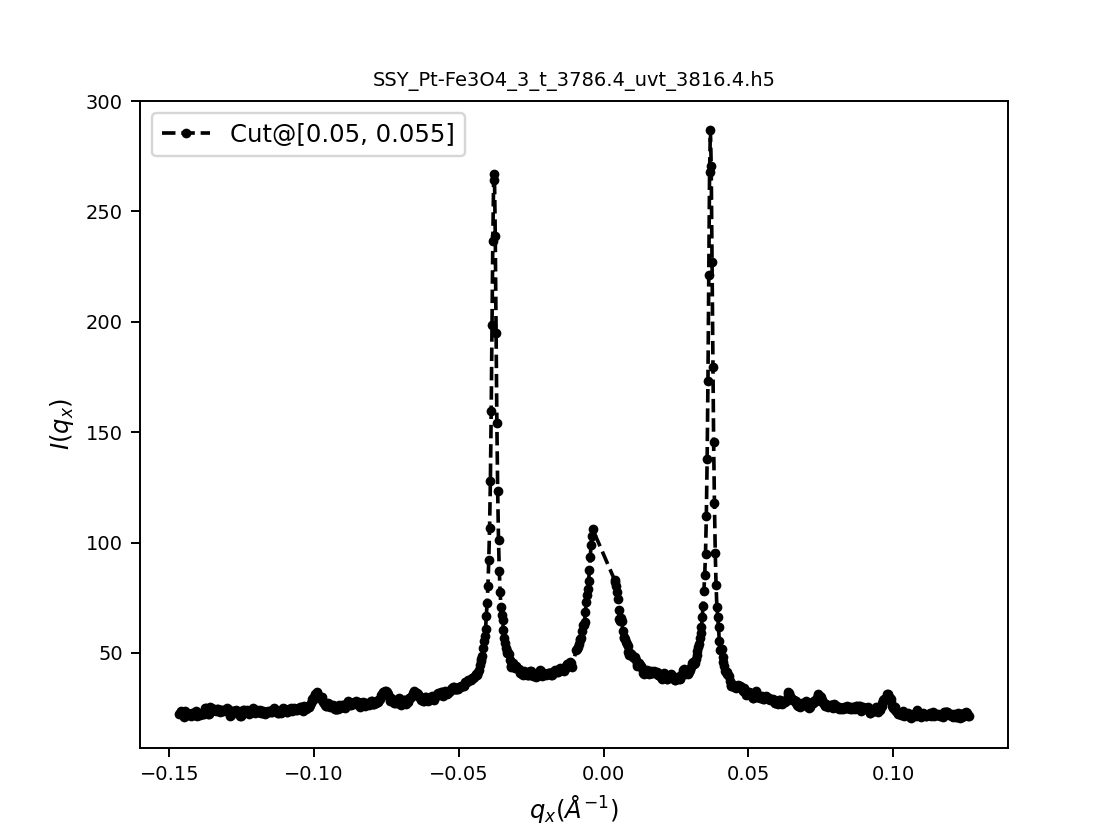

Text(0.5, 1.0, 'SSY_Pt-Fe3O4_3_t_3786.4_uvt_3816.4.h5')

In [27]:
fig, ax= plt.subplots()
plot1D( x = qr_1d, y = iqr_1d, ax=ax, m='o', ls='--', c='k', markersize = 3, legend='Cut@%s'% qz_range_cut )
ax.set_xlabel( r'$q_x (\AA^{-1})$')
ax.set_ylabel( r'$I(q_x) $')
ax.set_title( sam, fontsize=8 )
#plt.savefig( outDir + 'test.png' )  #save the plot

### Do a vertical line cut  

In [28]:
sam = 'SSY_Au_LC3_0.0500deg_ts2021-10-30-05-37-13_dt463.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'gisaxs', 'gisqimg' ] ) 
print( D.keys() )
#print(D)

dict_keys(['gisaxs', 'gisqimg'])


In [29]:
qr_range_cut =[ 0.061, 0.066 ] #define the vertical range of the line cut

In [30]:
img = D['gisqimg']

i=0
qr = D['gisqimg'][i]['qr']
qz = D['gisqimg'][i]['qz']
qimg_mask = ~(img[i]['img']==0)
qz_range_cut = None 
qr_range = [qr[0], qr[-1]] 
qz_range = [ qz[0], qz[-1]]

 
qz_1d, iqz_1d, = get_Phi_from_QPhi( img[i]['img'], qr_range, qz_range, qmask=qimg_mask, Qrange= qr_range_cut, Prange=qz_range_cut)

/home/group/Software/pyScatt/pyScatt/generic_functions.py:975: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts


In [31]:
#save to csv file
#save_lists( data=[qz_1d, iqz_1d ], label=['qz_1d', 'iqz_1d'],   filename='test.csv', path=outDir, sep=',', verbose=True, return_res=False)

<IPython.core.display.Javascript object>


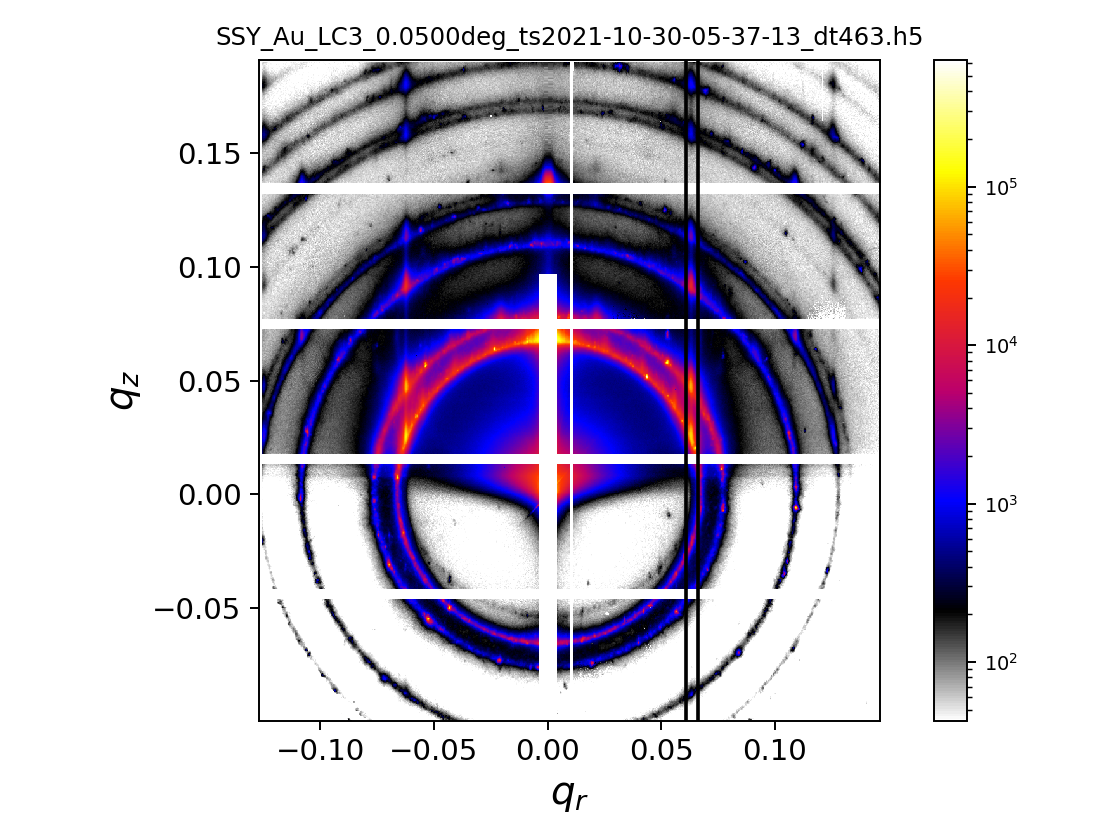

In [32]:
fig, ax= plt.subplots()
show_img( img[i]['img'],  extent=[qr[0], qr[-1], qz[0], qz[-1]  ],
       logs=True,  aspect=1.0, title_size=10,image_name= sam, xlabel= r'$q_r$',ylabel= r'$q_z$', ax=[fig,ax],
         zlim=[.3,1], cmap=cmap_vge_hdr, show_colorbar=True )
         #vmax= 10e4, vmin= 1.00, cmap=cmap_albula_r, show_colorbar=True )    
ax.vlines( qr_range_cut, qz[0], qz[-1], color='k')
plt.tight_layout()
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

<IPython.core.display.Javascript object>


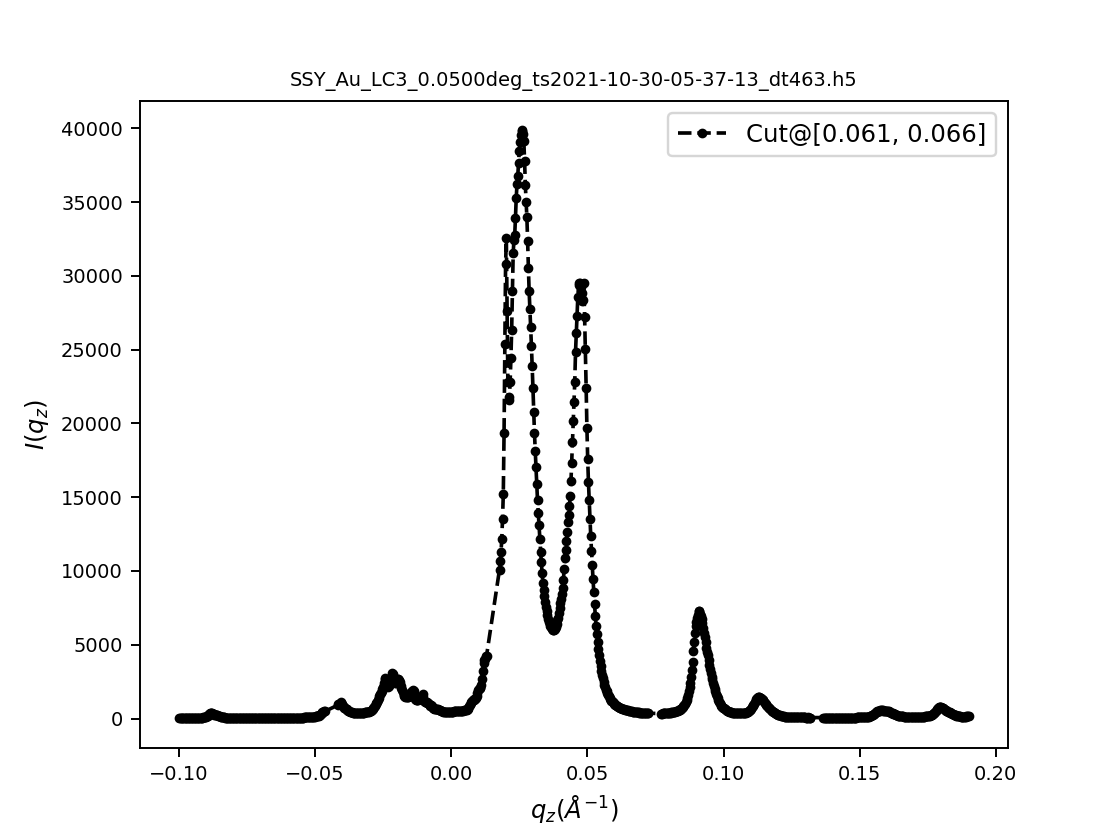

Text(0.5, 1.0, 'SSY_Au_LC3_0.0500deg_ts2021-10-30-05-37-13_dt463.h5')

In [33]:
fig, ax= plt.subplots()
plot1D( x = qz_1d, y = iqz_1d, ax=ax, m='o', ls='--', c='k', markersize = 3,   legend='Cut@%s'% qr_range_cut )
ax.set_xlabel( r'$q_z (\AA^{-1})$')
ax.set_ylabel( r'$I(q_z) $')
ax.set_title( sam, fontsize=8 )
#plt.savefig( outDir + 'test.png' )  #save the plot

# The END!